#### Computational Physics - Fall 2020
#### Shalma Wegsman

## Homework #4

### Problem 1 - Done in PDF


### Problem 2 - Exercise 5.7 in Newman
(A)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math

In [2]:
def func1(x):
    fnc = np.sin(np.sqrt(100*x))**2
    return(fnc)

def func1_d(x):
    fnc_d = (10*np.cos(10*np.sqrt(x))*np.sin(10*np.sqrt(x)))/np.sqrt(x)
    return(fnc_d)

def func1_d2(x):
    fnc_d2 = (50*np.cos(10*np.sqrt(x))**2)/x - (5*np.cos(10*np.sqrt(x))*np.sin(10*np.sqrt(x)))/x**(3/2) - (50*np.sin(10*np.sqrt(x))^2)/x
    return(fnc_d2)

def func1_d3(x):
    fnc_d3 = -((75*np.cos(20*np.sqrt(x)))/x**2) + (5*(3 - 400*x)*np.sin(20*np.sqrt(x)))/(4(x**(5/2)))
    return(fnc_d3)

Text(0, 0.5, 'function')

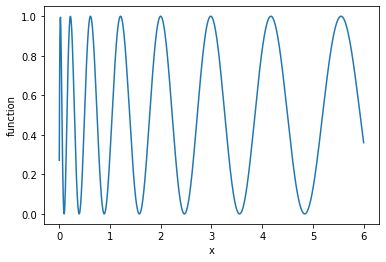

In [3]:
num = 1000
x = 6. * (np.arange(num, dtype=np.float64) + 0.5) / np.float64(num)
plt.plot(x, func1(x))
plt.xlabel('x')
plt.ylabel('function')

In [4]:
def trap_integral(f,a,b,N):
    x = np.linspace(a,b,N)
    h = (b-a)/np.float64(N)
    trap_int =[]
    trap = f(a)*h/2 + f(b)*h/2
    trap_int.append(trap)
    for i in x:
        new = f(i)*h
        trap+=new
        trap_int.append(trap)
    return(trap, trap_int)

def trap_int_tol(f,a,b,tol):
    trap1 = trap_integral(f,a,b,1)[0]
    trap2 = trap_integral(f,a,b,2)[0]
    n = 2
    h=(b-a)/np.float64(n)
    err_slice = (trap2-trap1)/3
    while np.abs(err_slice) > tol:
        n*=2
        h=(b-a)/np.float64(n)
        trap1 = trap_integral(f,a,b,n-1)[0]
        trap2 = trap_integral(f,a,b,n)[0]
        err_slice = (trap2-trap1)/3
        print("N= ",n,", Integral= ",trap2,", Error= ",err_slice)
    return(n,trap2,err_slice)

In [5]:
trap_int_tol(func1,0,1,1e-6)

N=  4 , Integral=  0.39708792115291236 , Error=  0.027204553194720444
N=  8 , Integral=  0.39290886862703117 , Error=  -0.003742713615110138
N=  16 , Integral=  0.41912772988610997 , Error=  0.0011598315781166102
N=  32 , Integral=  0.4432025557086222 , Error=  0.00021428525598673107
N=  64 , Integral=  0.451385150460307 , Error=  3.3920464653725e-05
N=  128 , Integral=  0.4540957029010573 , Error=  5.851668434845673e-06
N=  256 , Integral=  0.4550862854757979 , Error=  1.135645741353238e-06
N=  512 , Integral=  0.4554898872602926 , Error=  2.4340854069363854e-07


(512, 0.4554898872602926, 2.4340854069363854e-07)

(B)

Now repeat using Romberg integration:

In [6]:
def romb_integral(f,a,b,N):
    #h = (b-a)/np.float64(N)
    R11= trap_integral(f,a,b,1)[0]
    R = [[R11]]
    for i in range(2,N+1):
        #print(i)
        Ri = []
        Ri1 = trap_integral(f,a,b,i)[0]
        Ri.append(Ri1)
        for j in range(2,i+1):
            Rij = Ri[j-2] + (Ri[j-2] - R[i-2][j-2])/(-1 + 4**(j-1))
            Ri.append(Rij)
        R.append(Ri)
    return(R[N-1][N-1],R)
        

def romb_int_tol(f,a,b,tol):
    romb1 = romb_integral(f,a,b,1)[0]
    romb2 = romb_integral(f,a,b,2)[0]
    n = 2
    h=(b-a)/np.float64(n)
    err_slice = (romb2-romb1)/3
    while np.abs(err_slice) > tol:
        n*=2
        h=(b-a)/np.float64(n)
        romb1 = romb_integral(f,a,b,n-1)[0]
        romb2 = romb_integral(f,a,b,n)[0]
        err_slice = (romb2-romb1)/(3)
        print("N= ",n,", Integral= ",romb2,", Error= ",err_slice)
    return(n,romb2,err_slice)

In [7]:
r = romb_int_tol(func1,0,1,1e-6)
print(r)

N=  4 , Integral=  0.43067800813483564 , Error=  0.025789353166818112
N=  8 , Integral=  0.3886908309163794 , Error=  -0.0013773100528253572
N=  16 , Integral=  0.4205799225159876 , Error=  0.0011004092462186439
N=  32 , Integral=  0.4434715224765649 , Error=  0.00020640520352658656
N=  64 , Integral=  0.45142787041805893 , Error=  3.3322110916481997e-05
N=  128 , Integral=  0.45410308480312644 , Error=  5.803951656465263e-06
N=  256 , Integral=  0.45508771918748675 , Error=  1.1313503564721235e-06
N=  512 , Integral=  0.45549019466134466 , Error=  2.429738195271665e-07
(512, 0.45549019466134466, 2.429738195271665e-07)


### Problem 3: Vector Potential

In [28]:
def Find_ksqr(r,theta):
    ksqr = (8*r*np.sin(theta))/(4+r**2 +4*r*np.sin(theta))
    return(ksqr)

def Gauss_ch_int(f,a,b,N,r,theta):
    ksq = Find_ksqr(r,theta)
    x=[]
    for i in range(N):
        x.append(np.cos(np.pi*(i - 1/2)/N))
    fx=[]
    for j in x:
        fx.append(f(j,ksq))
    w = np.pi/N
    total_int = 0
    for i in range(N):
        total_int+= fx[i]*w
    return(total_int)

def K_fnc(x,ksqr): #derived in homework pdf
    fnc = 1/(np.sqrt((1-ksqr*x**2)*(1-x**2)))
    return(fnc)

def E_fnc(x,ksqr): #derived in hw pdf
    fnc = np.sqrt(1-ksqr*x**2)/np.sqrt(1 - x**2)
    return(fnc)

In [32]:
K = Gauss_ch_int(K_fnc,-1,1,50,2.3,np.pi)
E = Gauss_ch_int(E_fnc,0,1,50,2.3,np.pi)

print(K)
print(E)

10.847955479037491
10.84795547903749


In [33]:
def A(r,theta,N):
    a = 2
    I = 4
    mu4p = 1
    C = mu4p * 4*I*a /(np.sqrt(a**2 + r**2+2*a*r*np.sin(theta)))
    ksqr = Find_ksqr(r,theta)
    K = Gauss_ch_int(K_fnc,-1,1,N,r,theta)
    E = Gauss_ch_int(E_fnc,0,1,N,r,theta)
    A_val = C * ((2-ksqr)*K - 2*E)/ksqr
    return(A_val)

C:\Users\shalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Text(0.5, 1.0, '$A_{\\phi}$ for r=2.3')

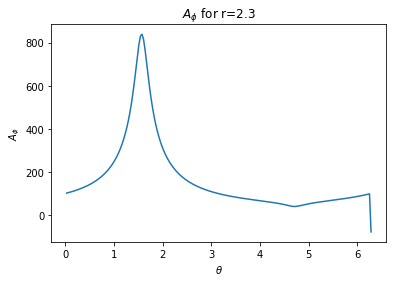

In [42]:
#(A) r = 2.3
r = 2.3
theta = np.linspace(0,2*np.pi,200)
A1 = []
for t in theta:
    aa = A(r,t,200)
    A1.append(aa)

plt.plot(theta,A1)
plt.xlabel('$\\theta$')
plt.ylabel('$A_{\phi}$')
plt.title('$A_{\phi}$ for r=2.3')

C:\Users\shalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Text(0.5, 1.0, '$A_{\\phi}$ for $\\theta = 2 \\pi/3$')

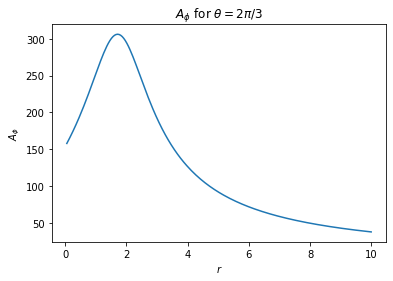

In [43]:
#(B) theta = 2pi/3
theta = 2*np.pi/3
r = np.linspace(0,10,200)
A2 = []
for i in r:
    aa = A(i,theta,200)
    A2.append(aa)

plt.plot(r,A2)
plt.xlabel('$r$')
plt.ylabel('$A_{\phi}$')
plt.title('$A_{\phi}$ for $\\theta = 2 \\pi/3$')

### Problem 4: Harmonic Oscillator

Exercise 5.13 in Newman

(A)

In [51]:
def H(n,x):
    if n==0:
        herm =1
        return(herm)
    herm = [1,2*x]
    i=2
    while i < n+1:
        new = 2*x*herm[i-1] - 2*(i-1)*herm[i-2]
        herm.append(new)
        i+=1
    return(herm[n])

def psi_n(x,N):
    HN = [H(N,i) for i in x]
    psi = [1/(np.sqrt(2**N * math.factorial(N) *np.sqrt(np.pi))) * np.exp(-x[i]**2 /2) * HN[i] for i in range(len(x))]
    return(psi)

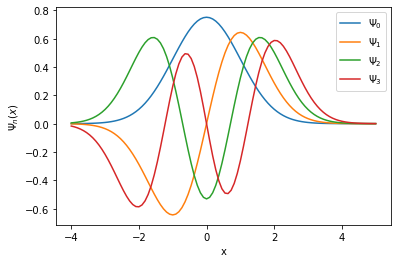

In [53]:
x=np.linspace(-4,5,100)

psi0 = psi_n(x,0)
psi1 = psi_n(x,1)
psi2 = psi_n(x,2)
psi3 = psi_n(x,3)


plt.plot(x,psi0,label='$\Psi_0$')
plt.plot(x,psi1,label='$\Psi_1$')
plt.plot(x,psi2,label='$\Psi_2$')
plt.plot(x,psi3,label='$\Psi_3$')
plt.xlabel('x')
plt.ylabel('$\Psi_n(x)$')
plt.legend()

(B)

Text(0, 0.5, '$\\Psi_{30}(x)$')

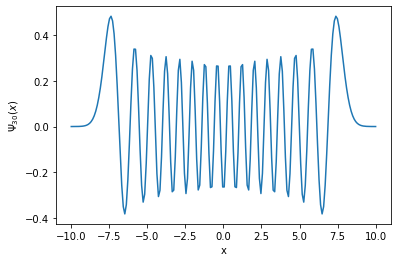

In [54]:
x=np.linspace(-10,10,200)
psi30 = psi_n(x,30)
plt.plot(x,psi30,label='$\Psi_{30}$')
plt.xlabel('x')
plt.ylabel('$\Psi_{30}(x)$')

(C)

In [102]:
def Gauss_quad_int(N, p):
    xi,wi=np.polynomial.legendre.leggauss(p)
    x = []
    dx = []
    for i in xi:
        xx = i/(1-i**2)
        x.append(xx)
        dxx =(1+i**2)/(1-i**2)**2
        dx.append(dxx)
    psi = psi_n(x, N)
    integ = 0
    for j in range(len(x)):
        integ += wi[j]*dx[j]*(x[j]*psi[j])**2
    return(integ)


In [103]:
print(np.sqrt(Gauss_quad_int(5, 100)))

2.3452078737858195
